# Objetivos

Nessa parte 2 do exercício relacionado ao tema SVM (Support Vector Machine), busca-se aplicar o classificador SVM a um problema de classificação real. Deseja-se ao final deste exercício conseguir realizar uma classificação de tipos de vidros do dataset "Glass Identification Database", encontrado em [1]. 

Esse *dataset* possui 214 intâncias e 9 atributos além de um identificador. Abaixo podem ser vistas algumas informações sobre os atributos.


   1. Id number: 1 a 214
   2. RI: índice de refração
   3. Na: Sódio (unidade de medida: porcentagem no peso do óxido correspondente, assim como nos atributos 4-10)
   4. Mg: Magnésio
   5. Al: Alumínio
   6. Si: Silício
   7. K: Potássio
   8. Ca: Cálcio
   9. Ba: Bário
   10. Fe: Ferro
   11. Tipo de vidro: (atributo de classe)
  
      - 1 building_windows_float_processed
      - 2 building_windows_non_float_processed
      - 3 vehicle_windows_float_processed
      - 4 vehicle_windows_non_float_processed (none in this database)
      - 5 containers
      - 6 tableware
      - 7 headlamps



# Carregar base de dados

In [1]:
# Imports:
from numpy import pi
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset:
headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
df = pd.read_csv("~/Documents/UFMG/10/Reconhecimento de padrões/list/pattern-recognition-exercises/list_5/databases/glass.csv", names = headers)
#df.columns = headers
df.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Separar os dados de atributos dos de classe

Abaixo retirou-se a coluna Id e separou-se os dados de atributos (X) dos de classe (y). Além disso, foi realizada a normalização dos dados.

In [3]:
X = df.drop("Class", axis=1)
X = X.drop("Id", axis=1)
y = df["Class"]
normalizer = StandardScaler()
X = normalizer.fit_transform(X)

# Definição do valor de C

Inicialmente decidiu-se tentar encontrar um bom valor para o parâmetro C. Para isso, utilizou-se a função  GridSearchCV do pacote sklearn. Essa fução realiza uma busca exaustiva sobre valores de parâmetros especificados para um estimador. Para tentar encontrar o melhor C é utilizada a técnica "*10 fold cross validation*" para cada um dos valores de C no *range* especificado.

A validação cruzada consiste no particionamento do conjunto de dados em subconjuntos mutuamente exclusivos, e posteriormente, o uso de alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento), sendo os subconjuntos restantes (dados de validação ou de teste) empregados na validação do modelo.
Nesse exercício foram utilizados 10 subconjuntos.


In [4]:
parameters = {'C':range(1, 100)}
svc = svm.SVC(kernel="rbf")
clf = GridSearchCV(svc, parameters, scoring='accuracy', refit=True, cv=10)  #To see results for each C just add: verbose=3
# Run fit with all sets of parameters.
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': range(1, 100)},
             scoring='accuracy')

In [5]:
C = clf.best_params_
score = clf.best_score_
print("The best accuracy average was " + str(score) + " and was achieved for " + str(C) )

The best accuracy average was 0.6595238095238096 and was achieved for {'C': 30}


Como pode ser visto acima o valor de C que resultou em uma melhor média de acurácia foi **C = 30**. A partir de então esse valor será utilizado para treinamento e teste dos modelos requisitados no relatório.  

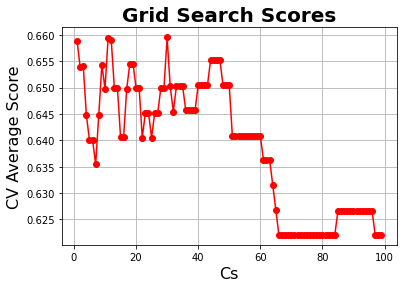

In [6]:
def plot_grid_search(cv_results, grid_param_1, name_param_1):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    ax.plot(grid_param_1, scores_mean[:], '-o', color="red")

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.grid('on')

# Calling Method 
Cs = np.arange(1,100)
plot_grid_search(clf.cv_results_, Cs, 'Cs')

# Treinamento e validação 

Como requisitado, abaixo está mostrado a acurácia média e desvio padrão para 10 experimentos variando randomicamente o conjunto de treinamento e teste. A cada iteração 85% dos dados foram usados para treinamento e 15% para teste.

In [7]:
acc = np.zeros(10)
for i in range(0, 10):
    # Separate data between training and test:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Training:
    clf = make_pipeline(StandardScaler(), svm.SVC(kernel="rbf", C=30))
    clf.fit(X_train, y_train)

    # Call predict on the estimator with the best found parameters.
    y_pred = clf.predict(X_test)
    acc[i] = (accuracy_score(y_test,y_pred))
    
print("A acurácia média e desvio padrão para 10 experimentos foi:")
print('{:.3f}'.format(acc.mean()) + " +/- " + '{:.3f}'.format(acc.std())) 

A acurácia média e desvio padrão para 10 experimentos foi:
0.700 +/- 0.050


Como pode-se ver acima, o modelo gerado obteve uma acurácia de 0.700 +/- 0.050, considerando os 10 experimentos realizados.
Para o último experimento foi gerada ainda a matrix de confusão da classificação. 

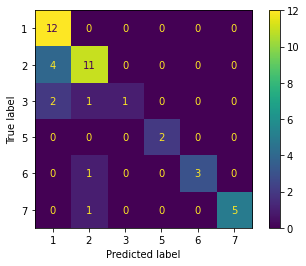

In [8]:
plot_confusion_matrix(clf, X_test, y_test)

Acredita-se que não foi possível obter um classificador melhor devido a pequena quantidade de dados e também ao fato de a quantidade de dados por classe estar desbalanceada.

# Referências

[1] Blake, Catherine. "UCI repository of machine learning databases." http://www.ics.uci.edu/~mlearn/MLRepository.html (1998).